# Imports

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier


# Read data

In [14]:
df = pd.read_csv('student_data.csv')

## Check for duplicates

In [32]:
df.ID.nunique()

23999

In [33]:
df.ID.size

23999

In [38]:
df.drop(columns = ['ID'], inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,350000,1,1,2,37,-2,-2,-2,-2,-2,...,466,466,316,316,316,466,466,316,316,0
1,50000,2,2,1,37,2,2,2,0,0,...,13026,13268,13497,5500,0,580,600,600,600,0
2,50000,2,1,2,23,-1,-1,-1,-1,-1,...,4800,9810,660,2548,2321,4800,9810,660,2980,0
3,20000,1,3,1,56,0,0,0,0,2,...,13784,13420,13686,1508,1216,1116,0,490,658,0
4,110000,2,2,2,32,0,0,0,0,0,...,108829,110557,106082,5400,5400,4100,4100,4100,4200,0


## Preview data

In [15]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2873,350000,1,1,2,37,-2,-2,-2,-2,...,466,466,316,316,316,466,466,316,316,0
1,3598,50000,2,2,1,37,2,2,2,0,...,13026,13268,13497,5500,0,580,600,600,600,0
2,27623,50000,2,1,2,23,-1,-1,-1,-1,...,4800,9810,660,2548,2321,4800,9810,660,2980,0
3,6874,20000,1,3,1,56,0,0,0,0,...,13784,13420,13686,1508,1216,1116,0,490,658,0
4,6444,110000,2,2,2,32,0,0,0,0,...,108829,110557,106082,5400,5400,4100,4100,4100,4200,0


In [16]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [29]:
target = df['default payment next month']

In [27]:
inputs = df.columns.drop('default payment next month')
inputs

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

# EDA

## Check for missing values

In [25]:
df.isna().sum(); # None missing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26ca4110>]],
      dtype=object)

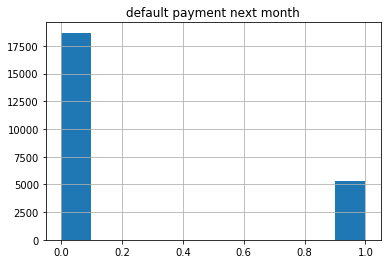

In [18]:
df.hist(column = 'default payment next month')

In [41]:
df['default payment next month'].value_counts()

0    18691
1     5308
Name: default payment next month, dtype: int64

In [42]:
5308/18691 # % of people who default

0.28398694558878607

In [24]:
df.groupby('EDUCATION')['default payment next month'].value_counts()

EDUCATION  default payment next month
0          0                               11
1          0                             6826
           1                             1616
2          0                             8532
           1                             2656
3          0                             2982
           1                             1012
4          0                               95
           1                                5
5          0                              209
           1                               14
6          0                               36
           1                                5
Name: default payment next month, dtype: int64

# Split Data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df[inputs], target, test_size = 0.2, random_state = 10)

(df['BILL_AMT4'] - df['PAY_AMT4']).value_counts()

# KNN?

# Logistic Regression

# Tree

# Random forest

In [49]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [48]:
X_train.shape

(19199, 24)

In [52]:
# find the best n_estimators using learning rate

score=[]
for i in range(0,200,10):
    rf= RandomForestClassifier(n_estimators=i+1,random_state=666)
    scores=cross_val_score(rf,X_train,y_train,cv=10).mean()
    score.append(scores)

In [55]:
score

[0.7257650056865567,
 0.8053542322907802,
 0.8120730640242234,
 0.8132706011142808,
 0.8136872677244333,
 0.815041543067616,
 0.8158230373354638,
 0.8158750934714112,
 0.8160832369599257,
 0.8162915703497731,
 0.8163959540303874,
 0.8167605373637208,
 0.8168125663870534,
 0.8173333998616716,
 0.8175937894439803,
 0.8178540162093142,
 0.8174894328477238,
 0.8175936808239784,
 0.8174373765987486,
 0.8174374579931074]

In [57]:
print("Max Score: {}".format(max(score)))

Max Score: 0.8178540162093142


In [60]:
print("Range of n_estimators : {}".format(score.index(max(score))))

Range of n_estimators : 15


In [61]:
score2=[]
for i in range(0, 30):
    rf= RandomForestClassifier(n_estimators=i+1,random_state=666)
    scores=cross_val_score(rf,X_train,y_train,cv=10).mean()
    score2.append(scores)

In [64]:
print("Max Score: {}".format(max(score2)))
print("Range of n_estimators : {}".format(score2.index(max(score2))))


Max Score: 0.8145728744054608
Range of n_estimators : 27


### Gridsearch for optimal parameters

In [ ]:
grid_params={n_estimators: ,
             verbose: 1,
             max_depth: ,
             min_samples_split: ,
             min_samples_leaf: ,
             min_weight_fraction_leaf: ,
             max_features: ,
             max_leaf_nodes: ,
             min_impurity_decrease: ,
            }

In [46]:
rf= RandomForestClassifier(random_state=666)

In [ ]:
gs=GridSearchCV()

In [ ]:
# fit -> predict
rand_forest = RandomForestClassifier(